In [1]:
import pandas as pd
import numpy as np
import requests
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3'
response = requests.get(url)

In [3]:
# check the status code
response.status_code

400

In [18]:
MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"


# term = 'Axe Throwing'
# location = 'Brooklyn'
term = 'bagels'
location = 'Bergen County'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response_bagels = requests.get(url, headers=headers, params=url_params)

In [20]:
print(response_bagels)
#the response is 400 everytime I try to make my search limit over 50? why?

<Response [200]>


In [21]:
print(response_bagels.text)

, "rating": 4.0, "coordinates": {"latitude": 40.9253291941864, "longitude": -74.1022327377253}, "transactions": ["delivery", "pickup"], "price": "$", "location": {"address1": "34-05 Broadway", "address2": null, "address3": null, "city": "Fair Lawn", "zip_code": "07410", "country": "US", "state": "NJ", "display_address": ["34-05 Broadway", "Fair Lawn, NJ 07410"]}, "phone": "+12017734087", "display_phone": "(201) 773-4087", "distance": 2781.0318394223186}, {"id": "m6KUH9vS3JQXsAgKPZ9bWg", "alias": "j-and-j-bagel-ridgefield", "name": "J & J Bagel", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/DCMwrwqwVQ3XnveXGYQzVQ/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/j-and-j-bagel-ridgefield?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA", "review_count": 54, "categories": [{"alias": "delis", "title": "Delis"}, {"alias": "bagels", "title": "Bagels"}], "rating": 4.0, "coordinates": {"latit

In [23]:
bagels = response_bagels.text
bagels = json.loads(bagels)
print(type(bagels))

<class 'dict'>


In [25]:
for key in bagels.keys():
    print(key)

businesses
total
region


In [27]:
bagels['businesses'][0]

{'id': 'KcEibAoIUQp6rl81u77vRA',
 'alias': 'river-road-hot-bagels-fair-lawn',
 'name': 'River Road Hot Bagels',
 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/SmODELiI1OUz9Wwls2i3eA/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/river-road-hot-bagels-fair-lawn?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA',
 'review_count': 143,
 'categories': [{'alias': 'bagels', 'title': 'Bagels'},
  {'alias': 'coffee', 'title': 'Coffee & Tea'},
  {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}],
 'rating': 4.5,
 'coordinates': {'latitude': 40.93468, 'longitude': -74.13374},
 'transactions': ['delivery'],
 'price': '$',
 'location': {'address1': '13-30 River Rd',
  'address2': '',
  'address3': '',
  'city': 'Fair Lawn',
  'zip_code': '07410',
  'country': 'US',
  'state': 'NJ',
  'display_address': ['13-30 River Rd', 'Fair Lawn, NJ 07410']},
 'phone': '+12017915646',
 'display_p

In [30]:
bagels['total']

8800

In [31]:
bagels['region']

{'center': {'longitude': -74.08355712890625, 'latitude': 40.945980470934344}}

In [36]:
#makeing the bagels dictionary a dataframe
bagels_df = pd.DataFrame.from_dict(bagels['businesses'])

In [39]:
bagels_df.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object')

In [50]:
df = bagels_df.loc[:,['name', 'rating', 'review_count', 'price', 'location']]

In [49]:
why5stars = df[df['name'] == 'The Bagel Store']
why5stars

,name,rating,review_count,price,location
23,The Bagel Store,5.0,8,NaN,"{'address1': '69 5th Ave', 'address2': None, '..."


In [51]:
df

,name,rating,review_count,price,location
0,River Road Hot Bagels,4.5,143,$,"{'address1': '13-30 River Rd', 'address2': '',..."
1,Perry's Bagel Cafe,4.0,44,$,"{'address1': '501 Rt 17 S', 'address2': '', 'a..."
2,Paramus Bagels & Deli,4.0,27,$,"{'address1': '791 Rte 17', 'address2': None, '..."
3,Everything Bagel,4.0,28,NaN,"{'address1': '483 Rte 17 S', 'address2': '', '..."
4,Hot Bagels,4.0,60,$,"{'address1': '607 Saddle River Rd', 'address2'..."
5,Teaneck Road Hot Bagels,4.5,94,$,"{'address1': '976 Teaneck Rd', 'address2': '',..."
6,Bagel Supreme,4.0,27,$,"{'address1': '425 N Farview Ave', 'address2': ..."
7,Bagel Run,4.0,31,NaN,"{'address1': '505 Saddle River Rd', 'address2'..."
8,Kinderkamack Hot Bagels,4.0,57,$,"{'address1': '935 Kinderkamack Rd', 'address2'..."
9,Bagel Box,4.5,52,$,"{'address1': '191 US Highway 46 E', 'address2'..."


In [66]:
df = df.sort_values('rating', ascending = False)
df

,name,rating,review_count,price,location
23,The Bagel Store,5.0,8,NaN,"{'address1': '69 5th Ave', 'address2': None, '..."
18,Betsys' Bagels & Deli,5.0,1,NaN,"{'address1': '192 Main St', 'address2': '', 'a..."
37,Griddle This,4.5,43,$,"{'address1': '17 Grant Ave', 'address2': None,..."
5,Teaneck Road Hot Bagels,4.5,94,$,"{'address1': '976 Teaneck Rd', 'address2': '',..."
9,Bagel Box,4.5,52,$,"{'address1': '191 US Highway 46 E', 'address2'..."
10,The Bagel House,4.5,84,$,"{'address1': '324 N Main St', 'address2': '', ..."
38,Empire Bagels,4.5,107,$,"{'address1': '3101 Westchester Ave', 'address2..."
26,Plaza Bagel & Deli,4.5,115,$,"{'address1': '850 Van Houten Ave', 'address2':..."
43,Boxcar Bagel & Deli,4.5,83,$,"{'address1': '10 River Rd', 'address2': '', 'a..."
14,Bagel Nosh of Waldwick,4.5,82,$,"{'address1': '24 E Prospect St', 'address2': '..."


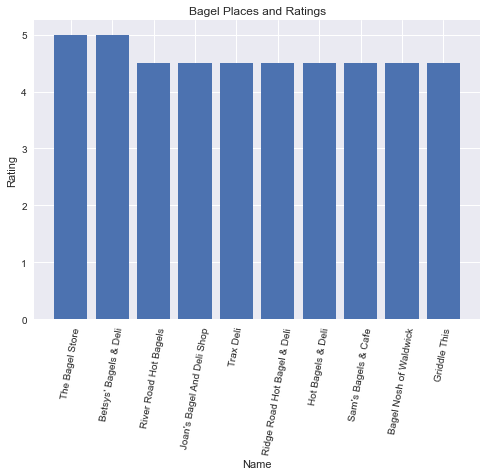

In [65]:
fig, ax = plt.subplots()
x = df['name'][:10]
y = df['rating'][:10]
ax.set_xlabel('Name')
ax.set_ylabel('Rating')
ax.set_title('Bagel Places and Ratings')
plt.xticks(rotation=80)
ax.bar(x,y)

plt.savefig('Bagels_namerating')

In [75]:
MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"


term = 'bagels'
location = 'NYC'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response_bagelNYC = requests.get(url, headers=headers, params=url_params)

In [76]:
print(response_bagelNYC)
#search limit still won't let me exceed 50 and I have no idea why 

<Response [200]>


In [77]:
print(response_bagelNYC.text)

358, "longitude": -73.958862}, "transactions": ["delivery", "pickup"], "price": "$", "location": {"address1": "1229 1st Ave", "address2": "", "address3": "", "city": "New York", "zip_code": "10065", "country": "US", "state": "NY", "display_address": ["1229 1st Ave", "New York, NY 10065"]}, "phone": "+12127446444", "display_phone": "(212) 744-6444", "distance": 7206.574490626029}, {"id": "QdmvRfJb86BVvk6A-J5gAg", "alias": "modern-bread-and-bagel-new-york", "name": "Modern Bread and Bagel", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/XySQYgsbD_axefpGshzz0A/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/modern-bread-and-bagel-new-york?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA", "review_count": 156, "categories": [{"alias": "breakfast_brunch", "title": "Breakfast & Brunch"}, {"alias": "bakeries", "title": "Bakeries"}, {"alias": "bagels", "title": "Bagels"}], "rating": 4.0, "coo

In [78]:
bagelNYC = response_bagelNYC.text
bagelNYC = json.loads(bagelNYC)
print(type(bagelNYC))

<class 'dict'>


In [80]:
for key in bagelNYC.keys():
    print(key)

businesses
total
region


In [81]:
#makeing the NYC bagels dictionary a dataframe
bagelNYC_df = pd.DataFrame.from_dict(bagelNYC['businesses'])

In [82]:
bagelNYC_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,j1S3NUrkB3BVT49n_e76NQ,best-bagel-and-coffee-new-york,Best Bagel & Coffee,https://s3-media2.fl.yelpcdn.com/bphoto/9-8DVz...,False,https://www.yelp.com/biz/best-bagel-and-coffee...,3328,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",4.5,"{'latitude': 40.7522683, 'longitude': -73.9910...","[delivery, pickup]",$,"{'address1': '225 W 35th St', 'address2': '', ...",+12125644409,(212) 564-4409,5213.531501
1,VrCCr45dhN-RRM107iptdg,russ-and-daughters-new-york,Russ & Daughters,https://s3-media3.fl.yelpcdn.com/bphoto/EN-MJ-...,False,https://www.yelp.com/biz/russ-and-daughters-ne...,2241,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",4.5,"{'latitude': 40.722589, 'longitude': -73.98828...",[],$$,"{'address1': '179 E Houston St', 'address2': '...",+12124754880,(212) 475-4880,1972.496648
2,EhqrXqxMb70I1NrnMAGJMA,the-bagel-store-brooklyn-18,The Bagel Store,https://s3-media2.fl.yelpcdn.com/bphoto/ArO3vL...,False,https://www.yelp.com/biz/the-bagel-store-brook...,8,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",5.0,"{'latitude': 40.680582, 'longitude': -73.977476}","[delivery, pickup]",NaN,"{'address1': '69 5th Ave', 'address2': None, '...",+13475294301,(347) 529-4301,3106.996779
3,JV5oa5-KGdiWnqrKPoxSug,absolute-bagels-new-york,Absolute Bagels,https://s3-media2.fl.yelpcdn.com/bphoto/GjaYFL...,False,https://www.yelp.com/biz/absolute-bagels-new-y...,1411,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.5,"{'latitude': 40.80251, 'longitude': -73.96745}",[],$,"{'address1': '2788 Broadway', 'address2': '', ...",+12129322052,(212) 932-2052,11028.952386
4,c3eMI4_o4dPDDhPV_ibBYQ,ess-a-bagel-new-york,Ess-a-Bagel,https://s3-media1.fl.yelpcdn.com/bphoto/KJliJ0...,False,https://www.yelp.com/biz/ess-a-bagel-new-york?...,3630,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.0,"{'latitude': 40.756300559255, 'longitude': -73...","[delivery, pickup]",$,"{'address1': '831 3rd Ave', 'address2': '', 'a...",+12129801010,(212) 980-1010,6003.433037
5,oi39VAwo4-KGm_gSkWPCsQ,tompkins-square-bagels-avenue-a-new-york,Tompkins Square Bagels - Avenue A,https://s3-media1.fl.yelpcdn.com/bphoto/ueQExu...,False,https://www.yelp.com/biz/tompkins-square-bagel...,1118,"[{'alias': 'bagels', 'title': 'Bagels'}]",4.0,"{'latitude': 40.72823, 'longitude': -73.9823}","[delivery, pickup]",$,"{'address1': '165 Avenue A', 'address2': '', '...",+16463516520,(646) 351-6520,2727.847810
6,Gpc2-sPCXlIQUrkfi4bpzw,court-street-bagels-brooklyn,Court Street Bagels,https://s3-media2.fl.yelpcdn.com/bphoto/2WYCmV...,False,https://www.yelp.com/biz/court-street-bagels-b...,209,"[{'alias': 'bagels', 'title': 'Bagels'}]",4.0,"{'latitude': 40.68804, 'longitude': -73.99301}",[],$,"{'address1': '181 Court St', 'address2': '', '...",+17186243972,(718) 624-3972,1939.740017
7,mpCQzQAT4Rken3mFBlwqLw,bagels-on-the-square-new-york,Bagels on the Square,https://s3-media2.fl.yelpcdn.com/bphoto/xVap3s...,False,https://www.yelp.com/biz/bagels-on-the-square-...,442,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",3.5,"{'latitude': 40.730604, 'longitude': -74.002152}","[delivery, pickup]",$,"{'address1': '7 Carmine St', 'address2': '', '...",+12126913041,(212) 691-3041,2874.898250
8,pb_ryc8FYHpUPV56eV2Eyg,brooklyn-bagel-and-coffee-company-new-york-2,Brooklyn Bagel & Coffee Company,https://s3-media2.fl.yelpcdn.com/bphoto/hUTrAB...,False,https://www.yelp.com/biz/brooklyn-bagel-and-co...,1450,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",4.0,"{'latitude': 40.746183, 'longitude': -73.997642}","[delivery, pickup]",$,"{'address1': '286 8th Ave', 'address2': '', 'a...",+12129242824,(212) 924-2824,4538.650359
9,foO2N-TrdPBO-dFn6M35TA,brooklyn-bagel-and-coffee-company-new-york-8,Brooklyn Bagel & Coffee Company,https://s3-media1.fl.yelpcdn.com/bphoto/2ssnQh...,False,https://www.yelp.com/biz/brooklyn-bagel-and-co...,118,"[{'alias': 'bagels', 'title': 'Bagels

In [84]:
bagelNYC_df.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object')

In [88]:
NYC_df = bagelNYC_df.loc[:, ['name', 'rating', 'location']].sort_values('rating', ascending = False)

In [89]:
NYC_df

,name,rating,location
25,Jeva Cafe,5.0,"{'address1': '513 Wilson Ave', 'address2': '',..."
2,The Bagel Store,5.0,"{'address1': '69 5th Ave', 'address2': None, '..."
9,Brooklyn Bagel & Coffee Company,4.5,"{'address1': '63 E 8th St', 'address2': None, ..."
42,Empire Bagels,4.5,"{'address1': '3101 Westchester Ave', 'address2..."
1,Russ & Daughters,4.5,"{'address1': '179 E Houston St', 'address2': '..."
13,Utopia Bagels,4.5,"{'address1': '1909 Utopia Pkwy', 'address2': '..."
11,Brooklyn Bagel & Coffee Company,4.5,"{'address1': '35-05 Broadway', 'address2': '',..."
10,Liberty Bagels Midtown,4.5,"{'address1': '260 W 35th St', 'address2': '', ..."
0,Best Bagel & Coffee,4.5,"{'address1': '225 W 35th St', 'address2': '', ..."
49,Juju's Bagels Cafe,4.5,"{'address1': '35-62 76th St', 'address2': '', ..."


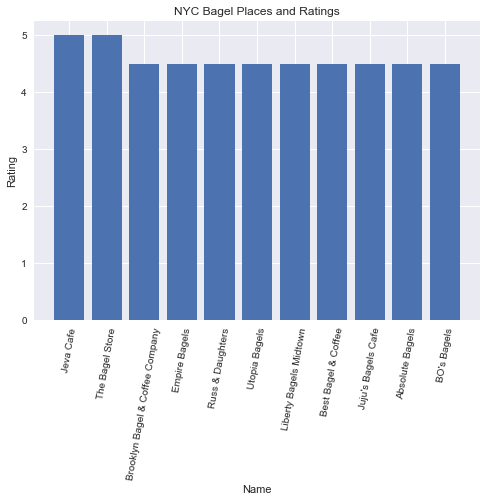

In [90]:
fig, ax = plt.subplots()
x = NYC_df['name'][:12]
y = NYC_df['rating'][:12]
ax.set_xlabel('Name')
ax.set_ylabel('Rating')
ax.set_title('NYC Bagel Places and Ratings')
plt.xticks(rotation=80)
ax.bar(x,y)

plt.savefig('BagelsNYC_namerating')

In [92]:
MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"


term = 'bagels'
location = 'Washington DC'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response_bagelDC = requests.get(url, headers=headers, params=url_params)

In [93]:
print(response_bagelDC)

<Response [200]>


In [94]:
print(response_bagelDC.text)

QKHCrhlTKdsiBD5A/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/deli-zique-washington-2?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA", "review_count": 89, "categories": [{"alias": "coffee", "title": "Coffee & Tea"}, {"alias": "bagels", "title": "Bagels"}, {"alias": "sandwiches", "title": "Sandwiches"}], "rating": 4.0, "coordinates": {"latitude": 38.901534, "longitude": -77.0215305}, "transactions": ["delivery"], "price": "$", "location": {"address1": "650 Massachusetts Ave NW", "address2": null, "address3": "", "city": "Washington, DC", "zip_code": "20001", "country": "US", "state": "DC", "display_address": ["650 Massachusetts Ave NW", "Washington, DC 20001"]}, "phone": "+12024080417", "display_phone": "(202) 408-0417", "distance": 1341.25081187225}, {"id": "9xdPsw6s9EelttkM39TF_w", "alias": "bethesda-bagels-bethesda", "name": "Bethesda Bagels", "image_url": "https://s3-media1.fl.yelpcd

In [96]:
bagelDC = response_bagelDC.text
#json.loads() used to convert the JSON string doc into a python dictionary
bagelDC = json.loads(bagelDC)
print(type(bagelDC))

<class 'dict'>


In [98]:
for key in bagelDC.keys():
    print(key)

businesses
total
region


In [99]:
bagelDC_df = pd.DataFrame.from_dict(bagelDC['businesses'])

In [100]:
bagelDC_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,jyQobjkr19yLgdV2gGR-Ow,pearl-s-bagels-washington,Pearl’s Bagels,https://s3-media2.fl.yelpcdn.com/bphoto/3uEewb...,False,https://www.yelp.com/biz/pearl-s-bagels-washin...,29,"[{'alias': 'bagels', 'title': 'Bagels'}]",4.5,"{'latitude': 38.90356, 'longitude': -77.02156}",[],"{'address1': '1017 7th St NW', 'address2': '',...",,,1160.248870,NaN
1,0-OTVzmRIV1csYwQYuCa8g,call-your-mother-washington-2,Call Your Mother,https://s3-media3.fl.yelpcdn.com/bphoto/MKAXY1...,False,https://www.yelp.com/biz/call-your-mother-wash...,403,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",4.5,"{'latitude': 38.93138, 'longitude': -77.0233}",[delivery],"{'address1': '3301 Georgia Ave NW', 'address2'...",,,2318.007652,$$
2,XtzYoWiKUB64aQ6RHYaz8Q,bagels-etc-washington,Bagels Etc.,https://s3-media2.fl.yelpcdn.com/bphoto/nNCrXA...,False,https://www.yelp.com/biz/bagels-etc-washington...,488,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",4.0,"{'latitude': 38.90939, 'longitude': -77.04762}",[delivery],"{'address1': '2122 P St NW', 'address2': '', '...",+12024667171,(202) 466-7171,1483.247871,$
3,73AjCQfjOdGQRzQ36duuNg,call-your-mother-washington-3,Call Your Mother,https://s3-media1.fl.yelpcdn.com/bphoto/t6Tbg0...,False,https://www.yelp.com/biz/call-your-mother-wash...,22,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",4.0,"{'latitude': 38.881112, 'longitude': -76.995294}",[],"{'address1': '701 8th St SE', 'address2': None...",,,4540.494588,NaN
4,sXFBW4wWKmAraO4O_Z6nWg,call-your-mother-washington-4,Call Your Mother,https://s3-media4.fl.yelpcdn.com/bphoto/2ovO69...,False,https://www.yelp.com/biz/call-your-mother-wash...,20,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...",4.0,"{'latitude': 38.9076174, 'longitude': -77.068837}",[],"{'address1': '3428 O St NW', 'address2': '', '...",,,3330.211280,NaN
5,hcfd7_wJQHbpE-s8YBrmZA,bethesda-bagels-washington-2,Bethesda Bagels,https://s3-media2.fl.yelpcdn.com/bphoto/_SI4ua...,False,https://www.yelp.com/biz/bethesda-bagels-washi...,486,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",3.5,"{'latitude': 38.9132118, 'longitude': -77.0459...",[delivery],"{'address1': '1718 Connecticut Ave NW', 'addre...",+12022999399,(202) 299-9399,1324.699445,$
6,bbnUvWlliOZ2s51Ue7Jhng,bread-bite-bakery-washington,Bread Bite Bakery,https://s3-media4.fl.yelpcdn.com/bphoto/0kMp1v...,False,https://www.yelp.com/biz/bread-bite-bakery-was...,69,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.0,"{'latitude': 38.9168651, 'longitude': -77.03488}","[pickup, delivery]","{'address1': '1506 U St NW', 'address2': '', '...",+12022990909,(202) 299-0909,715.581414,$$
7,wfVrDncmUtDsk7hl-i0TvA,bullfrog-bagels-washington-2,Bullfrog Bagels,https://s3-media4.fl.yelpcdn.com/bphoto/XPZgMg...,False,https://www.yelp.com/biz/bullfrog-bagels-washi...,239,"[{'alias': 'breakfast_brunch', 'title': 'Break...",3.0,"{'latitude': 38.899853, 'longitude': -76.986801}","[pickup, delivery]","{'address1': '1341 H St NE', 'address2': '', '...",+12024945615,(202) 494-5615,4000.261777,$
8,FXdIxIb0dXRnltRW10il_Q,mercy-me-washington-2,Mercy Me,https://s3-media1.fl.yelpcdn.com/bphoto/Y7hyN7...,False,https://www.yelp.com/biz/mercy-me-washington-2...,45,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 38.904794, 'longitude': -77.047581}",[],"{'address1': '1143 New Hampshire Ave NW', 'add...",,,1634.008806,NaN
9,Pmx3C5fCik2ugHrSn-A5SA,sos-your-mom-washington,So's Your Mom,https://s3-media3.fl.yelpcdn.com/bphoto/C-WGwE...,False,https://www.yelp.com/biz/sos-your-mom-washingt...,321,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...",4.0,"{'latitude': 38.92171, 'longitude': -77.04383}",[delivery],"{'address1': '1831 Columbia Rd NW', 'address2'...",+12024623666,(202) 462-3666,1621.910563,$


In [101]:
DC_df = bagelDC_df.loc[:, ['name', 'rating', 'location']].sort_values('rating', ascending = False)

In [102]:
DC_df

,name,rating,location
36,Firehook Café,5.0,"{'address1': '401 F St NW', 'address2': 'Fl 2'..."
21,Bullfrog Bagels Food Truck,5.0,"{'address1': '4810 Wisconsin Ave NW', 'address..."
20,Call Your Mother,5.0,"{'address1': '8804 Old Georgetown Rd', 'addres..."
33,Heat Da Spot,5.0,"{'address1': '3213 Georgia Ave NW', 'address2'..."
0,Pearl’s Bagels,4.5,"{'address1': '1017 7th St NW', 'address2': '',..."
28,A Baked Joint,4.5,"{'address1': '430 K St NW', 'address2': '', 'a..."
17,Baked By Yael,4.5,"{'address1': '3000 Connecticut Ave NW', 'addre..."
16,The Pretzel Bakery,4.5,"{'address1': '257 15th St SE', 'address2': Non..."
15,Buffalo & Bergen - Capitol Hill,4.5,"{'address1': '240 Massachusetts Ave NE', 'addr..."
1,Call Your Mother,4.5,"{'address1': '3301 Georgia Ave NW', 'address2'..."


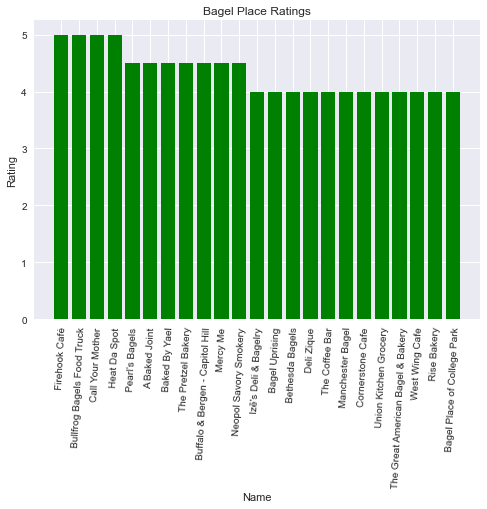

In [109]:
fig, ax = plt.subplots()
x = DC_df['name'][:24]
y = DC_df['rating'][:24]
ax.set_xlabel('Name')
ax.set_ylabel('Rating')
ax.set_title('Bagel Place Ratings')
plt.xticks(rotation=87)
ax.bar(x,y, color = 'green')

plt.savefig('BagelsDC_namerating')

In [137]:
API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"

term = 'ice cream'
location = 'NYC'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT,
                'offset': 100,
            }
            # return request(API_KEY, url_params=url_params)
response_NYCicecream = requests.get(url, headers=headers, params=url_params)

In [138]:
print(response_NYCicecream)

<Response [200]>


In [118]:
print(response_NYCicecream.text)

le": "Desserts"}, {"alias": "icecream", "title": "Ice Cream & Frozen Yogurt"}, {"alias": "shavedice", "title": "Shaved Ice"}], "rating": 4.5, "coordinates": {"latitude": 40.71417, "longitude": -73.99095}, "transactions": ["pickup", "delivery"], "price": "$", "location": {"address1": "150 E Broadway", "address2": null, "address3": "", "city": "New York", "zip_code": "10002", "country": "US", "state": "NY", "display_address": ["150 E Broadway", "New York, NY 10002"]}, "phone": "", "display_phone": "", "distance": 1009.8063467391988}, {"id": "Q0JWPHcXTDKNP4c8QNU4pw", "alias": "taiyaki-nyc-williamsburg-brooklyn-6", "name": "Taiyaki NYC - Williamsburg", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/gI3pFVUsN4xKoWAM0oG7kw/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/taiyaki-nyc-williamsburg-brooklyn-6?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA", "review_count": 203, "categories": 

In [141]:
NYCicecream = response_NYCicecream.text
NYCicecream = json.loads(NYCicecream)
print(type(NYCicecream))

<class 'dict'>


In [142]:
for key in NYCicecream.keys():
    print(key)

businesses
total
region


In [143]:
NYCicecream_df = pd.DataFrame.from_dict(NYCicecream['businesses'])

In [146]:
NYCicecream_df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,4pdtmUi92jdRFVBoYCRyZg,ollie-s-ice-cream-stuff-brooklyn,Ollie’s Ice Cream + Stuff,https://s3-media3.fl.yelpcdn.com/bphoto/VuK5qC...,False,https://www.yelp.com/biz/ollie-s-ice-cream-stu...,28,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.0,"{'latitude': 40.70233, 'longitude': -73.92042}","[delivery, pickup]",$$,"{'address1': '158 Irving Ave', 'address2': '',...",+17182086825,(718) 208-6825,6228.433045
1,J1oBixicsaIkVZm_xXxR1w,van-dyks-ice-cream-ridgewood,Van Dyk's Ice Cream,https://s3-media3.fl.yelpcdn.com/bphoto/UMXy8r...,False,https://www.yelp.com/biz/van-dyks-ice-cream-ri...,233,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.0,"{'latitude': 40.97746, 'longitude': -74.12731}",[delivery],$$,"{'address1': '145 Ackerman Ave', 'address2': '...",+12014441429,(201) 444-1429,32254.814091
2,t7aTKsPEnOKy4w31N1RZ0g,ample-hills-creamery-brooklyn-7,Ample Hills Creamery,https://s3-media2.fl.yelpcdn.com/bphoto/ZRLd9S...,False,https://www.yelp.com/biz/ample-hills-creamery-...,64,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.5,"{'latitude': 40.69088, 'longitude': -73.982848}","[delivery, pickup]",$$,"{'address1': '445 Albee Square W', 'address2':...",+19293682762,(929) 368-2762,1885.169791
3,vYIbZ0-6DNmfVTu0kKBQTw,last-licks-homemade-ice-cream-east-hanover,Last Licks Homemade Ice Cream,https://s3-media4.fl.yelpcdn.com/bphoto/nzZw-m...,False,https://www.yelp.com/biz/last-licks-homemade-i...,109,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.5,"{'latitude': 40.817519, 'longitude': -74.382863}",[delivery],$,"{'address1': '134 Ridgedale Ave', 'address2': ...",+19735857988,(973) 585-7988,35018.826813
4,QirEbcHa6wXkkVnDpO5cqQ,chloes-soft-serve-fruit-co-new-york-4,Chloe's Soft Serve Fruit Co,https://s3-media2.fl.yelpcdn.com/bphoto/R6cO_4...,False,https://www.yelp.com/biz/chloes-soft-serve-fru...,513,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.0,"{'latitude': 40.73733, 'longitude': -73.99058}","[delivery, pickup]",$$,"{'address1': '25 E 17th St', 'address2': '', '...",+12126750550,(212) 675-0550,3564.059616


In [147]:
NYCicecream_df.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object')

In [149]:
NYCicecream_df = NYCicecream_df.loc[:,['name', 'alias', 'rating', 'price', 'location' ]]

In [159]:
NYCicecream_df = NYCicecream_df.sort_values('rating', ascending=False)
NYCicecream_df.head(7)

,name,alias,rating,price,location
25,Van Leeuwen Ice Cream,van-leeuwen-ice-cream-new-york-33,5.0,NaN,"{'address1': '120 Macdougal St', 'address2': '..."
28,Sweet Dynasty,sweet-dynasty-brooklyn-2,5.0,$,"{'address1': '5918 5th Ave', 'address2': None,..."
15,Taste Crème,taste-crème-long-island-city-2,5.0,NaN,"{'address1': '13-11 Jackson Ave', 'address2': ..."
31,Crema,crema-jersey-city,5.0,$$,"{'address1': '695 Bergen Ave', 'address2': Non..."
21,Vida’s Brooklyn,vida-s-brooklyn-brooklyn,5.0,NaN,"{'address1': '704 Dekalb Ave', 'address2': Non..."
45,Oddfellows Ice Cream Co,oddfellows-ice-cream-co-brooklyn-8,5.0,NaN,"{'address1': '334 Furman St', 'address2': '', ..."
5,The Tasty Waffle Company - Waffle Bar,the-tasty-waffle-company-waffle-bar-brooklyn,5.0,NaN,"{'address1': '227 Malcolm X Blvd', 'address2':..."


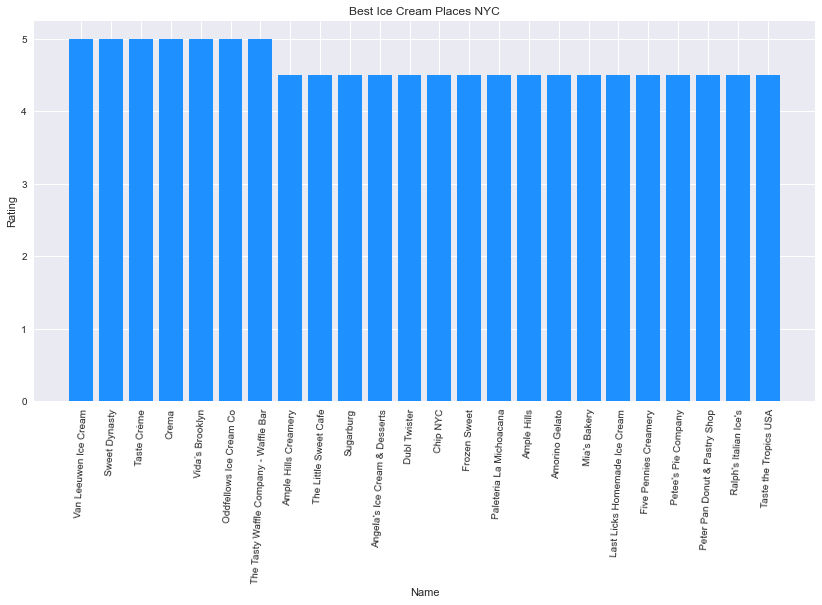

In [160]:
fig, ax = plt.subplots(figsize=(14,7))
x = NYCicecream_df['name'][:24]
y = NYCicecream_df['rating'][:24]
ax.set_xlabel('Name')
ax.set_ylabel('Rating')
ax.set_title('Best Ice Cream Places NYC')
plt.xticks(rotation=87)
ax.bar(x,y, color = 'dodgerblue')

plt.savefig('IceCreamNYC_namerating')

In [162]:
API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"

term = 'ice cream'
location = 'Boston'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT,
                'offset': 100,
            }
            # return request(API_KEY, url_params=url_params)
response_Bostonicecream = requests.get(url, headers=headers, params=url_params)

In [163]:
print(response_Bostonicecream)

<Response [200]>


In [164]:
Bostonicecream = response_Bostonicecream.text
Bostonicecream = json.loads(Bostonicecream)
print(type(Bostonicecream))

<class 'dict'>


In [166]:
Bostonicecream_df = pd.DataFrame.from_dict(Bostonicecream['businesses'])

In [167]:
Bostonicecream_df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,umSO7veSVjf8QflZOonmlA,zinnekens-belgian-waffles-harvard-square-cambr...,Zinneken's Belgian Waffles - Harvard Square,https://s3-media2.fl.yelpcdn.com/bphoto/Uhpm2u...,False,https://www.yelp.com/biz/zinnekens-belgian-waf...,504,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.0,"{'latitude': 42.3712, 'longitude': -71.1145}","[pickup, delivery]",$,"{'address1': '1154 Massachusetts Ave', 'addres...",+16178760836,(617) 876-0836,4407.112557
1,lIaNz1coA8BZxLVRaaGfLg,ct-sweet-kingdom-boston,Ct Sweet Kingdom,https://s3-media4.fl.yelpcdn.com/bphoto/JeIjz7...,False,https://www.yelp.com/biz/ct-sweet-kingdom-bost...,87,"[{'alias': 'desserts', 'title': 'Desserts'}]",3.0,"{'latitude': 42.3514576, 'longitude': -71.0622...",[],$,"{'address1': '15 Beach St', 'address2': '', 'a...",+16173388885,(617) 338-8885,843.719443
2,e6WA4_4-4SzEzAHPsn7VNQ,cafe-madeleine-boston-2,Cafe Madeleine,https://s3-media2.fl.yelpcdn.com/bphoto/vewKj-...,False,https://www.yelp.com/biz/cafe-madeleine-boston...,263,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.5,"{'latitude': 42.3420690000057, 'longitude': -7...",[delivery],$$,"{'address1': '517 Columbus Ave', 'address2': '...",+18572398052,(857) 239-8052,963.146411
3,2WkpUx7N2N2V45f5s4TRoQ,frosty-freeze-roslindale-2,Frosty Freeze,https://s3-media3.fl.yelpcdn.com/bphoto/s3tjuz...,False,https://www.yelp.com/biz/frosty-freeze-roslind...,7,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",4.5,"{'latitude': 42.286295409199, 'longitude': -71...",[],$,"{'address1': '510 American Legion Hwy', 'addre...",,,7479.870099
4,4sMj7f6HzPUPGpRRYPOWTw,sprinkles-ice-cream-shoppe-braintree-2,Sprinkles Ice Cream Shoppe,https://s3-media1.fl.yelpcdn.com/bphoto/iGqEsE...,False,https://www.yelp.com/biz/sprinkles-ice-cream-s...,4,"[{'alias': 'icecream', 'title': 'Ice Cream & F...",5.0,"{'latitude': 42.220295, 'longitude': -71.004118}",[],NaN,"{'address1': '357A Washington St', 'address2':...",+17815194726,(781) 519-4726,15215.145151


In [170]:
Bostonicecream_df = Bostonicecream_df.loc[:,['name', 'alias', 'rating', 'price', 'location' ]].sort_values('rating', ascending = False)
Bostonicecream_df.head()

,name,alias,rating,price,location
4,Sprinkles Ice Cream Shoppe,sprinkles-ice-cream-shoppe-braintree-2,5.0,NaN,"{'address1': '357A Washington St', 'address2':..."
41,L.A. Burdick Handmade Chocolates,l-a-burdick-handmade-chocolates-cambridge-5,4.5,$$,"{'address1': '52 Brattle St', 'address2': '', ..."
40,Chillbox,chillbox-waltham,4.5,$,"{'address1': '570 S St', 'address2': '', 'addr..."
3,Frosty Freeze,frosty-freeze-roslindale-2,4.5,$,"{'address1': '510 American Legion Hwy', 'addre..."
45,Fenway Cafe,fenway-cafe-boston,4.5,$,"{'address1': '61 Brookline Ave', 'address2': '..."


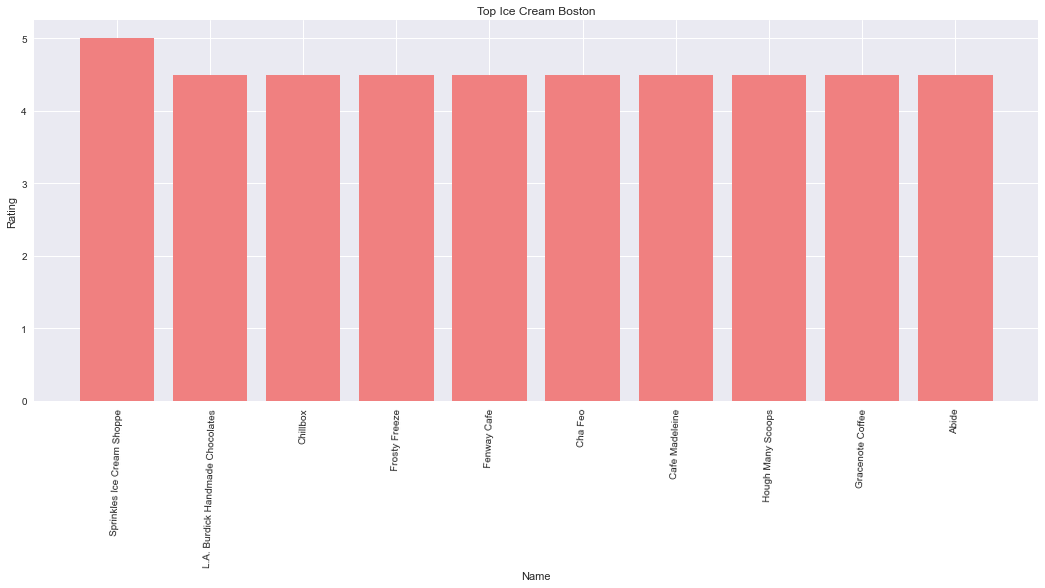

In [173]:
fig, ax = plt.subplots(figsize=(18,7))
x = Bostonicecream_df['name'][:10]
y = Bostonicecream_df['rating'][:10]
ax.set_xlabel('Name')
ax.set_ylabel('Rating')
ax.set_title('Top Ice Cream Boston')
plt.xticks(rotation=88)
ax.bar(x,y, color = 'lightcoral')

plt.savefig('IceCreamBoston_namerating')

In [176]:
Bostonicecream_df

,name,alias,rating,price,location
4,Sprinkles Ice Cream Shoppe,sprinkles-ice-cream-shoppe-braintree-2,5.0,NaN,"{'address1': '357A Washington St', 'address2':..."
41,L.A. Burdick Handmade Chocolates,l-a-burdick-handmade-chocolates-cambridge-5,4.5,$$,"{'address1': '52 Brattle St', 'address2': '', ..."
40,Chillbox,chillbox-waltham,4.5,$,"{'address1': '570 S St', 'address2': '', 'addr..."
3,Frosty Freeze,frosty-freeze-roslindale-2,4.5,$,"{'address1': '510 American Legion Hwy', 'addre..."
45,Fenway Cafe,fenway-cafe-boston,4.5,$,"{'address1': '61 Brookline Ave', 'address2': '..."
26,Cha Feo,cha-feo-boston,4.5,NaN,"{'address1': '248 Newbury St', 'address2': Non..."
2,Cafe Madeleine,cafe-madeleine-boston-2,4.5,$$,"{'address1': '517 Columbus Ave', 'address2': '..."
37,Hough Many Scoops,hough-many-scoops-quincy,4.5,$$,"{'address1': '1094 Sea St', 'address2': None, ..."
13,Gracenote Coffee,gracenote-coffee-boston-6,4.5,$,"{'address1': '108 Lincoln St', 'address2': '',..."
15,Abide,abide-cambridge,4.5,$,"{'address1': '317 Massachusetts Ave', 'address..."
